In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:\\Users\\User\\jupyter-noutbooks\\DATA\\hearing_test.csv')

In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [7]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [8]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

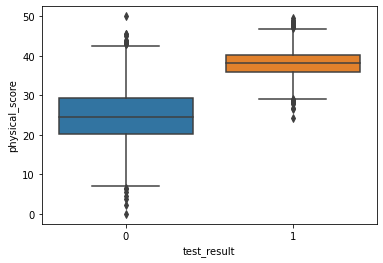

In [10]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<AxesSubplot:xlabel='test_result', ylabel='age'>

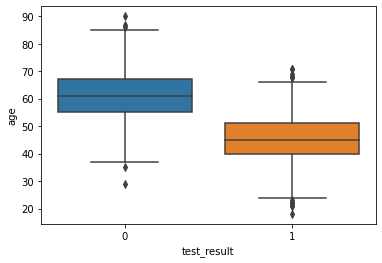

In [12]:
sns.boxplot(x='test_result',y='age',data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

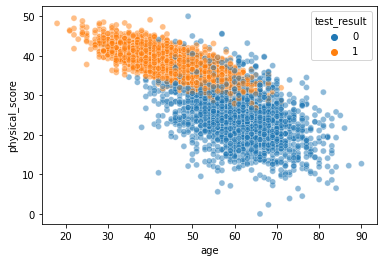

In [17]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result',alpha=0.5)

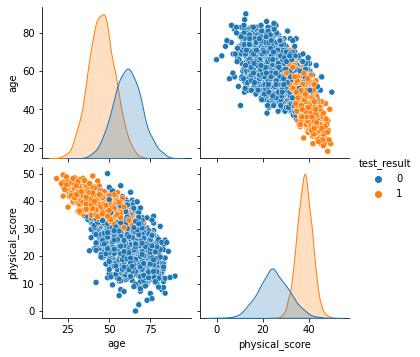

In [18]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:>

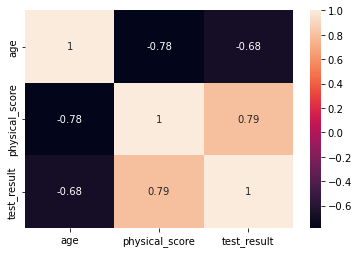

In [19]:
sns.heatmap(df.corr(),annot=True)

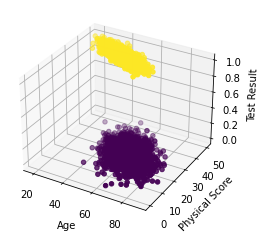

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])
ax.set_xlabel('Age')
ax.set_ylabel('Physical Score')
ax.set_zlabel('Test Result')

plt.show()

In [23]:
X = df.drop('test_result',axis=1)

In [24]:
y = df['test_result']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
scaler = StandardScaler()

In [29]:
scaled_X_train = scaler.fit_transform(X_train)

In [30]:
scaled_X_test = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()

In [33]:
model.fit(scaled_X_train,y_train)

LogisticRegression()

In [34]:
model.coef_

array([[-0.96920669,  3.5691453 ]])

In [35]:
predictions = model.predict(scaled_X_test)

In [36]:
predictions

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [37]:
model.coef_

array([[-0.96920669,  3.5691453 ]])

In [38]:
# age and physical_score
# If age feautre increases that mean belonging to class 1 decreases
# So if physical_score feature increases that mean belonging to class 1 also increases

In [39]:
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             classification_report)

In [40]:
accuracy_score(y_test,predictions)

0.9053333333333333

In [41]:
confusion_matrix(y_test,predictions)

array([[525,  84],
       [ 58, 833]], dtype=int64)

In [42]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


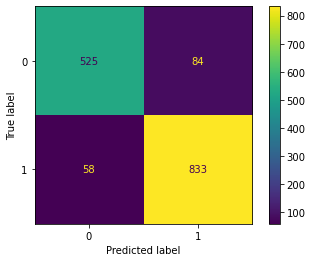

In [43]:
plot_confusion_matrix(model,scaled_X_test,y_test)

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       609
           1       0.91      0.93      0.92       891

    accuracy                           0.91      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.91      0.91      0.90      1500



In [46]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [47]:
precision_score(y_test,predictions)

0.9083969465648855

In [48]:
recall_score(y_test,predictions)

0.9349046015712682

In [49]:
f1_score(y_test,predictions)

0.9214601769911505

In [52]:
from sklearn.metrics import plot_roc_curve

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


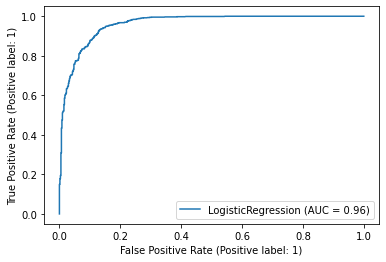

In [51]:
plot_roc_curve(model,scaled_X_test,y_test)